Input Place Name (Kassel/Germany), Output Place Polygone in GeoJson Format

In [1]:
import osmnx as ox
import geojson
import pandas as pd
import os

ox.settings.default_crs = "epsg:25832"


def get_place_postal_code_polygons(place_name):
    """
    Fetches postal code polygons for the specified place using OSMnx.
    """
    postal_code_polygons = ox.features_from_place(place_name, tags={"boundary": "postal_code"})
    
    # Create a DataFrame from the OSMnx features
    df = pd.DataFrame(postal_code_polygons).dropna(subset=['postal_code', 'geometry'])

    # Create a dictionary mapping postal codes to their respective geometries
    postal_code_polygon_dict = {feature['postal_code']: feature['geometry'] for _, feature in df.iterrows()}
    return postal_code_polygon_dict

def format_geojson_data(data):
    """
    Formats data into GeoJSON format.
    """
    geojson_features = []
    for postal_code, geometry in data.items():
        if geometry.is_empty:
            continue  # Skip empty geometries

        coordinates = []

        if geometry.geom_type == 'Polygon':
            coordinates = [list(geometry.exterior.coords)]
        elif geometry.geom_type == 'MultiPolygon':
            coordinates = [list(poly.exterior.coords) for poly in geometry.geoms]
        else:
            raise ValueError(f"Unsupported geometry type: {geometry.geom_type}")

        # Update "type" to "postal_code" and add the corresponding postal code
        feature = {
            "postal_code": postal_code,
            "geometry": {
                "type": geometry.geom_type,
                "coordinates": coordinates
            }
        }

        geojson_features.append(feature)

    # Create a GeoJSON FeatureCollection
    return geojson.FeatureCollection(geojson_features)

def save_geojson_to_file(geojson_data, file_name):
    """
    Saves GeoJSON data to a file in the same directory.
    """
    script_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in locals() else os.getcwd()
    file_path = os.path.join(script_dir, file_name)
    
    # Save the GeoJSON data to the file
    with open(file_path, 'w') as file:
        geojson.dump(geojson_data, file, indent=2)
    return file_path

def main():
    place_input = input("Geben Sie den Stadtnamen oder Ländernamen ein: ")

    place_postal_code_polygons = get_place_postal_code_polygons(place_input)
    place_geojson_data = format_geojson_data(place_postal_code_polygons)

    file_name = f"{place_input}_geojson_data.geojson"
    saved_file_path = save_geojson_to_file(place_geojson_data, file_name)

    print(f"{place_input} GeoJSON data saved to {saved_file_path}")

if __name__ == "__main__":
    main()


Germany GeoJSON data saved to c:\Users\Admin\OneDrive\Dokumente\Projects\Retoflow_Filter-1\Check_Out_Leon\c_Extractor_and_Functions\Germany_geojson_data.geojson


Plot

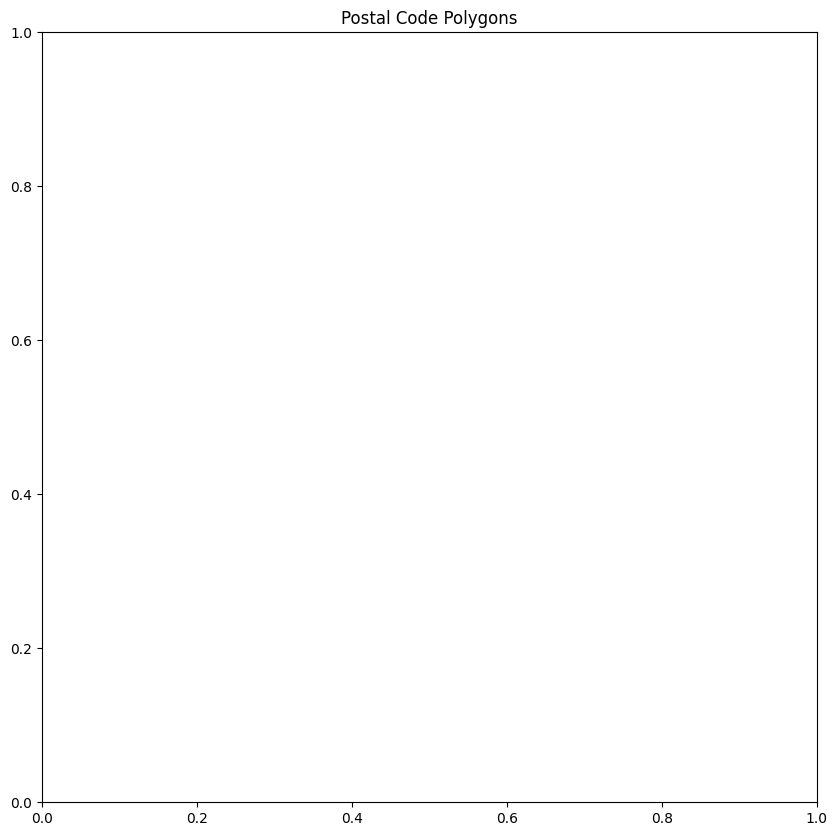

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

def plot_geojson_file(file_path):
    # Read the GeoJSON file into a GeoDataFrame
    gdf = gpd.read_file(file_path)

    # Plot the polygons
    fig, ax = plt.subplots(figsize=(10, 10))  # Set the figure size as needed

    for idx, row in gdf.iterrows():
        geometry_type = row['geometry'].geom_type

        if geometry_type == 'Polygon':
            row['geometry'].boundary.plot(ax=ax, color='blue', linewidth=0.5)
        elif geometry_type == 'MultiPolygon':
            for poly in row['geometry']:
                poly.boundary.plot(ax=ax, color='blue', linewidth=0.5)

    ax.set_title("Postal Code Polygons")
    plt.show()

# Example usage
file_name = "Germany_geojson_data.geojson"  # Update with your actual file name
script_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in locals() else os.getcwd()
file_path = os.path.join(script_dir, file_name)

plot_geojson_file(file_path)


----------------------------------------------

Testing Area